In [1]:
import pandas as pd

# Load the Cars24 dataset
cars_data = pd.read_csv('cars_details.csv')

# View the first few rows
cars_data.head()


C:\Users\USER\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,link,make,model,year_of_manufacture,km_driven,fuel_type,ownership,price,location,Reg year,Make year,Reg number,Engine capacity,Spare key,Transmission,KM driven,Fuel type
0,https://www.cars24.com/buy-used-maruti-swift-d...,Maruti,Swift Dzire VDI,2013,"1,09,035 km",Diesel,2nd owner,₹4.25L,"Bachupally, Hyderabad",Apr 2013,2013,AP10-BD4428Engine,1248 cc,YesTransmission,ManualKM,"109,035 km",Diesel2013
1,https://www.cars24.com/buy-used-maruti-ertiga-...,Maruti,Ertiga VXI AT SHVS,2022,"35,378 km",Petrol,1st owner,₹10.84L,"Bachupally, Hyderabad",May 2022,2022,TS12-EU4555Engine,1462 cc,YesTransmission,AutomaticKM,"35,378 km",Petrol2022
2,https://www.cars24.com/buy-used-maruti-alto-k1...,Maruti,Alto K10 VXI,2022,"22,864 km",Petrol,1st owner,₹4.15L,"Bachupally, Hyderabad",Nov 2022,2022,TS07-JM3858Engine,998 cc,YesTransmission,ManualKM,"22,864 km",Petrol2022
3,https://www.cars24.com/buy-used-maruti-baleno-...,Maruti,Baleno DELTA PETROL 1.2,2016,"55,511 km",Petrol,2nd owner,₹4.91L,"Kompally, Hyderabad",Oct 2016,2016,TS07-FE5376Engine,1197 cc,YesTransmission,ManualKM,"55,511 km",Petrol2016
4,https://www.cars24.com/buy-used-maruti-alto-80...,Maruti,Alto 800 LXI,2014,"43,780 km",Petrol,1st owner,₹2.39L,"Kompally, Hyderabad",Aug 2014,2014,TS08-EC0838Engine,796 cc,NoTransmission,ManualKM,"43,780 km",Petrol2014


In [2]:
#some of the columns should be remove because it is not necessary
cars_data.drop(['link', 'Reg year', 'Make year', 'Reg number', 'Engine capacity', 'Spare key', 'KM driven', 'Fuel type'], axis=1, inplace=True)

In [3]:
cars_data.rename(columns={'make':'Make','model':'Model','year_of_manufacture':'Year_of_Manufacture','km_driven':'Km_Driven',
                   'fuel_type':'Fuel_Type','ownership':'Ownership','price':'Price','location':'Location'},inplace=True)

In [4]:
cars_data.head()

,Make,Model,Year_of_Manufacture,Km_Driven,Fuel_Type,Ownership,Price,Location,Transmission
0,Maruti,Swift Dzire VDI,2013,"1,09,035 km",Diesel,2nd owner,₹4.25L,"Bachupally, Hyderabad",ManualKM
1,Maruti,Ertiga VXI AT SHVS,2022,"35,378 km",Petrol,1st owner,₹10.84L,"Bachupally, Hyderabad",AutomaticKM
2,Maruti,Alto K10 VXI,2022,"22,864 km",Petrol,1st owner,₹4.15L,"Bachupally, Hyderabad",ManualKM
3,Maruti,Baleno DELTA PETROL 1.2,2016,"55,511 km",Petrol,2nd owner,₹4.91L,"Kompally, Hyderabad",ManualKM
4,Maruti,Alto 800 LXI,2014,"43,780 km",Petrol,1st owner,₹2.39L,"Kompally, Hyderabad",ManualKM


# Exploratory Data Analysis

In [5]:
cars_data.shape

(214, 9)

In [6]:
#checking null values
(cars_data.isna().sum())/len(cars_data)*100

Make                   0.0
Model                  0.0
Year_of_Manufacture    0.0
Km_Driven              0.0
Fuel_Type              0.0
Ownership              0.0
Price                  0.0
Location               0.0
Transmission           0.0
dtype: float64

In [7]:
cars_data.isna().any()

Make                   False
Model                  False
Year_of_Manufacture    False
Km_Driven              False
Fuel_Type              False
Ownership              False
Price                  False
Location               False
Transmission           False
dtype: bool

In [8]:
# checking duplicates
cars_data.duplicated().sum()

0

In [9]:
cars_data[cars_data.duplicated()]

,Make,Model,Year_of_Manufacture,Km_Driven,Fuel_Type,Ownership,Price,Location,Transmission


In [10]:
# checking datatypes
cars_data.dtypes

Make                   object
Model                  object
Year_of_Manufacture     int64
Km_Driven              object
Fuel_Type              object
Ownership              object
Price                  object
Location               object
Transmission           object
dtype: object

In [11]:
# describe
cars_data.describe()

,Year_of_Manufacture
count,214.000000
mean,2018.266355
std,2.929386
min,2011.000000
25%,2017.000000
50%,2018.000000
75%,2021.000000
max,2023.000000


In [12]:
# info
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Make                 214 non-null    object
 1   Model                214 non-null    object
 2   Year_of_Manufacture  214 non-null    int64 
 3   Km_Driven            214 non-null    object
 4   Fuel_Type            214 non-null    object
 5   Ownership            214 non-null    object
 6   Price                214 non-null    object
 7   Location             214 non-null    object
 8   Transmission         214 non-null    object
dtypes: int64(1), object(8)
memory usage: 15.2+ KB


In [13]:
# checking no of cars

cars_data['Make'].value_counts()

Make
Maruti    199
Skoda      12
Toyota      3
Name: count, dtype: int64

In [14]:
# checking year

cars_data['Year_of_Manufacture'].value_counts()

Year_of_Manufacture
2018    31
2019    28
2017    27
2021    24
2022    22
2020    21
2016    17
2013    10
2014    10
2023    10
2012     6
2015     5
2011     3
Name: count, dtype: int64

In [15]:
# checking fuel type

cars_data['Fuel_Type'].value_counts()

Fuel_Type
Petrol    190
Diesel     21
CNG         3
Name: count, dtype: int64

In [16]:
# checking ownership

cars_data['Ownership'].value_counts()

Ownership
1st owner    159
2nd owner     53
3rd owner      2
Name: count, dtype: int64

In [17]:
# checking transmission

cars_data['Transmission'].value_counts()

Transmission
ManualKM       144
AutomaticKM     70
Name: count, dtype: int64

In [18]:
# Check for non-numeric values in the 'KiloMeter_Driven' column
invalid_km_entries = cars_data[~cars_data['Km_Driven'].str.replace(' km', '').str.replace(',', '').str.isnumeric()]

# Display the invalid entries
print(invalid_km_entries)


Empty DataFrame
Columns: [Make, Model, Year_of_Manufacture, Km_Driven, Fuel_Type, Ownership, Price, Location, Transmission]
Index: []


In [19]:
# Remove rows with invalid entries in 'KiloMeter_Driven'
cars_data = cars_data[cars_data['Km_Driven'].str.replace(' km', '').str.replace(',', '').str.isnumeric()]


In [20]:
# Remove ' km' and commas, then convert to integer
cars_data['Km_Driven'] = cars_data['Km_Driven'].str.replace(' km', '').str.replace(',', '').astype(int)

In [21]:
# Remove '₹' and 'L', then convert to float
cars_data['Price'] = cars_data['Price'].str.replace('₹', '').str.replace('L', '').astype(float) * 100000


In [22]:
# Remove invalid rows where KiloMeter_Driven contains non-numeric values
cars_data = cars_data[~cars_data['Km_Driven'].isin(['Petrol', 'Diesel'])]


In [23]:
# Group by car brand and calculate the average price
avg_price_per_brand = cars_data.groupby('Make')['Price'].mean().sort_values(ascending=False)
print(avg_price_per_brand)


Make
Skoda     969250.000000
Toyota    960666.666667
Maruti    552994.974874
Name: Price, dtype: float64


In [24]:
# Group by car brand and calculate the average kilometers driven
avg_km_per_brand = cars_data.groupby('Make')['Km_Driven'].mean().sort_values(ascending=False)
print(avg_km_per_brand)


Make
Skoda     66179.250000
Maruti    56578.708543
Toyota    40967.000000
Name: Km_Driven, dtype: float64


In [25]:
# Group by year and calculate the average price
avg_price_per_year = cars_data.groupby('Year_of_Manufacture')['Price'].mean().sort_values(ascending=False)
print(avg_price_per_year)


Year_of_Manufacture
2022    842772.727273
2023    826800.000000
2021    694000.000000
2020    622857.142857
2019    607321.428571
2018    560032.258065
2015    557800.000000
2017    512740.740741
2016    455647.058824
2014    357700.000000
2013    331500.000000
2012    304166.666667
2011    184000.000000
Name: Price, dtype: float64


# **Average Price per Brand (Bar Chart)**

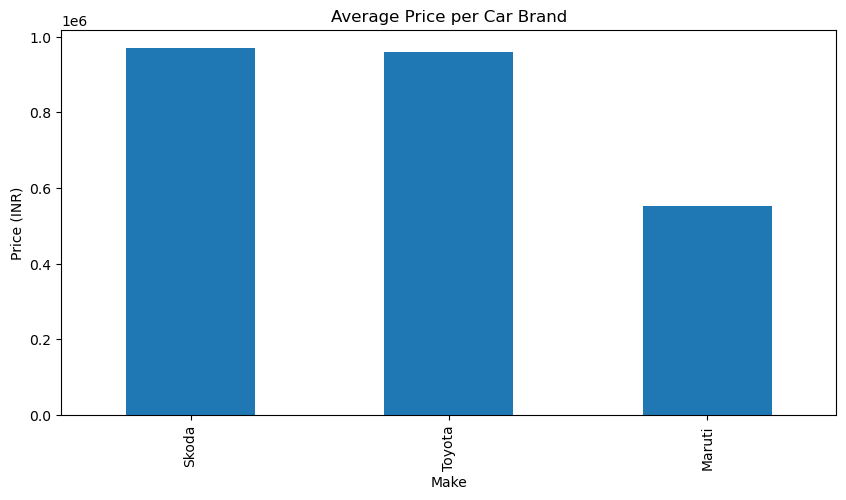

In [26]:
import matplotlib.pyplot as plt

# Plot average price per brand
avg_price_per_brand.plot(kind='bar', figsize=(10, 5))
plt.title('Average Price per Car Brand')
plt.ylabel('Price (INR)')
plt.show()

**Price vs. Kilometers Driven (Scatter Plot):**

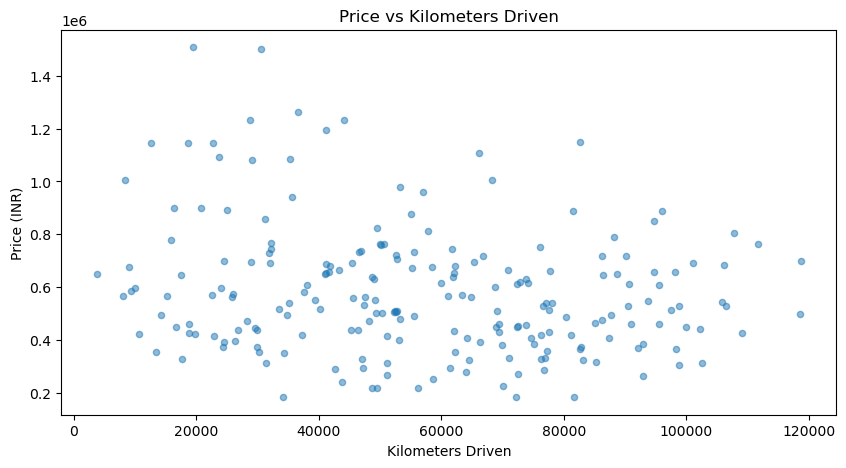

In [27]:
# Scatter plot of Price vs Kilometers Driven
cars_data.plot(kind='scatter', x='Km_Driven', y='Price', alpha=0.5, figsize=(10, 5))
plt.title('Price vs Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price (INR)')
plt.show()


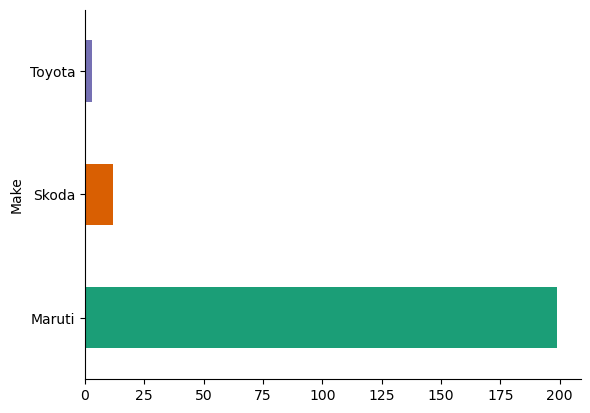

In [28]:
# @title Name

from matplotlib import pyplot as plt
import seaborn as sns
cars_data.groupby('Make').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Correlation between Price and Kilometers Driven: -0.20865924582623624


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


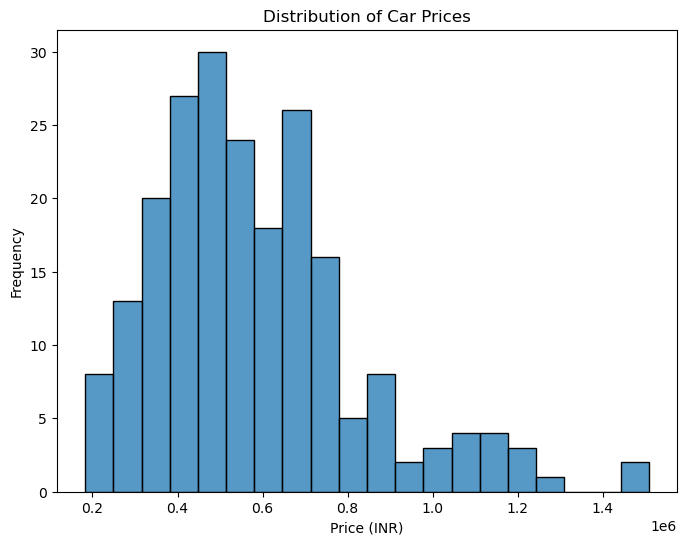

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


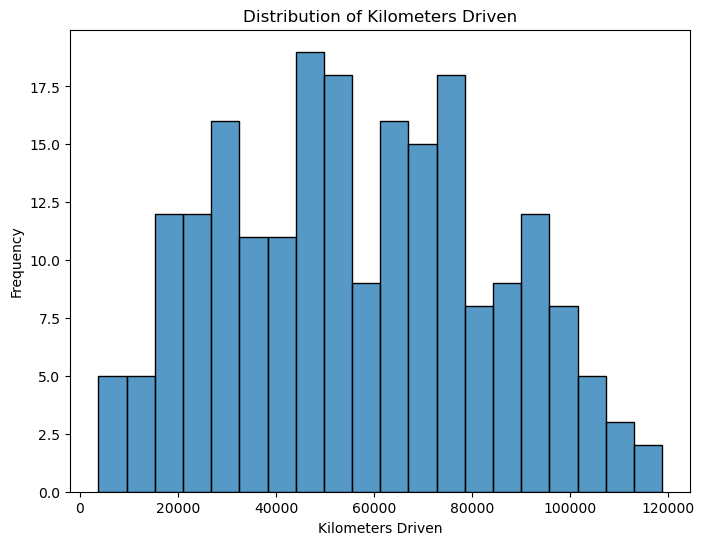

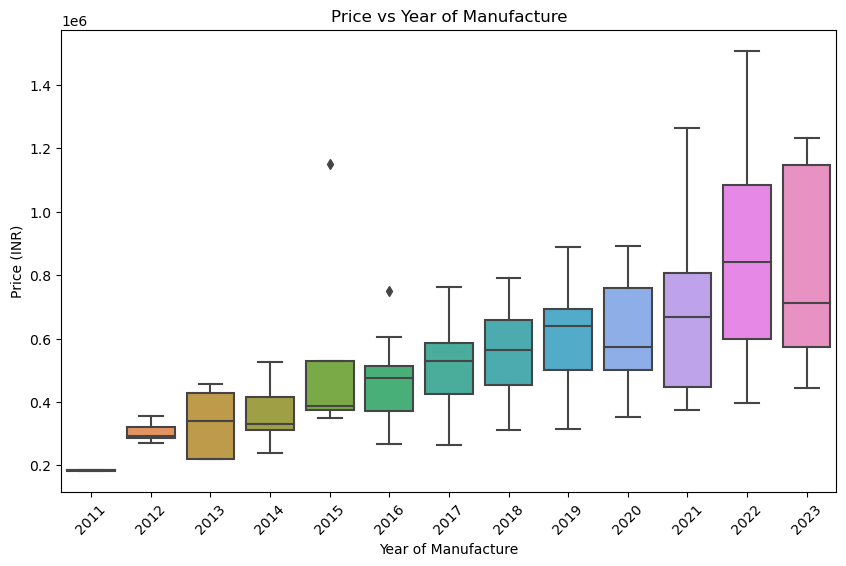

In [29]:
# prompt: insights please

# Calculate the correlation between price and kilometers driven
correlation = cars_data['Price'].corr(cars_data['Km_Driven'])
print(f"Correlation between Price and Kilometers Driven: {correlation}")

# Analyze the distribution of car prices
plt.figure(figsize=(8, 6))
sns.histplot(cars_data['Price'], bins=20)
plt.title('Distribution of Car Prices')
plt.xlabel('Price (INR)')
plt.ylabel('Frequency')
plt.show()

# Analyze the distribution of kilometers driven
plt.figure(figsize=(8, 6))
sns.histplot(cars_data['Km_Driven'], bins=20)
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')
plt.show()

# Analyze the relationship between price and year of manufacture
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year_of_Manufacture', y='Price', data=cars_data)
plt.title('Price vs Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (INR)')
plt.xticks(rotation=45)
plt.show()


    Brand  Average Price  Average Kilometers Driven
0  Maruti  552994.974874               56578.708543
1   Skoda  969250.000000               66179.250000
2  Toyota  960666.666667               40967.000000


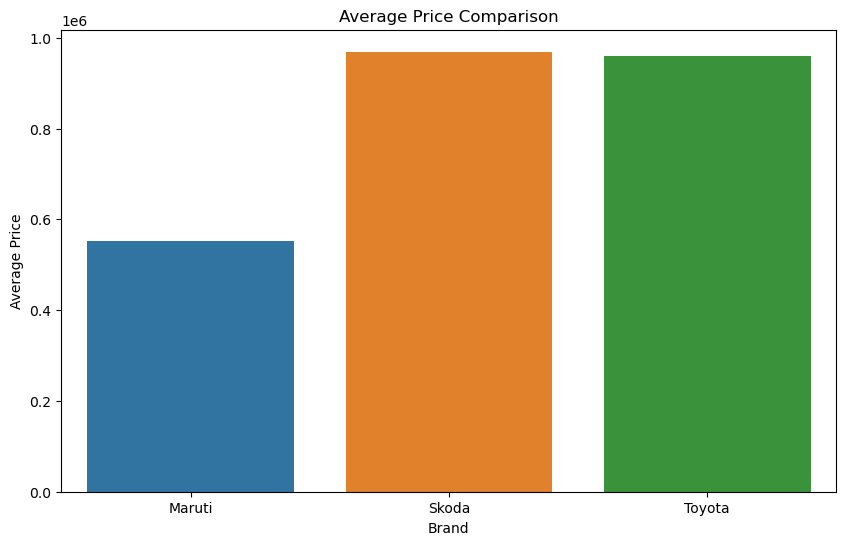

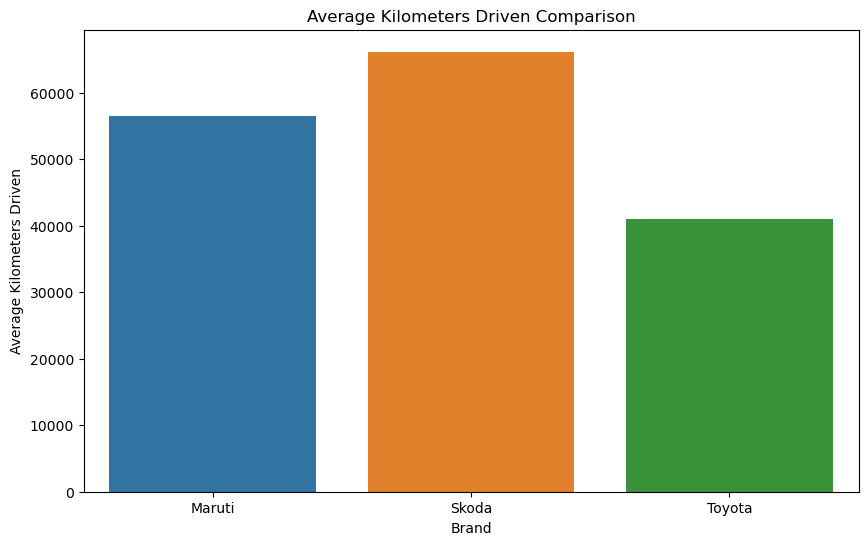

In [30]:
# Filter data for Maruti, Skoda, and Toyota
maruti_data = cars_data[cars_data['Make'] == 'Maruti']
skoda_data = cars_data[cars_data['Make'] == 'Skoda']
toyota_data = cars_data[cars_data['Make'] == 'Toyota']

# Calculate average price for each brand
avg_price_maruti = maruti_data['Price'].mean()
avg_price_skoda = skoda_data['Price'].mean()
avg_price_toyota = toyota_data['Price'].mean()

# Calculate average kilometers driven for each brand
avg_km_maruti = maruti_data['Km_Driven'].mean()
avg_km_skoda = skoda_data['Km_Driven'].mean()
avg_km_toyota = toyota_data['Km_Driven'].mean()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Brand': ['Maruti', 'Skoda', 'Toyota'],
    'Average Price': [avg_price_maruti, avg_price_skoda, avg_price_toyota],
    'Average Kilometers Driven': [avg_km_maruti, avg_km_skoda, avg_km_toyota]
})

print(comparison_df)

# Visualize the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Average Price', data=comparison_df)
plt.title('Average Price Comparison')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Brand', y='Average Kilometers Driven', data=comparison_df)
plt.title('Average Kilometers Driven Comparison')
plt.show()


Insights from the analysis:
- There appears to be a negative correlation between price and kilometers driven, indicating that cars with higher mileage tend to have lower prices.
- The distribution of car prices is skewed towards lower values, suggesting that a majority of cars are priced lower.
- The distribution of kilometers driven also shows a tendency towards lower values.
- There is a general trend of higher prices for cars manufactured in more recent years.
- Maruti appears to have the lowest average price compared to Skoda and Toyota.
- Skoda has the highest average price.
- There isn't a significant difference in average kilometers driven between the three brands.

In [31]:
import os

# Create a new directory called 'my_data' in the current working directory
os.makedirs('my_data', exist_ok=True)

# Check if the directory was created
print("Directory 'my_data' created or already exists.")

Directory 'my_data' created or already exists.


In [32]:
import os

# Get and print the current working directory
current_directory = os.getcwd()
print(f"The current working directory is: {current_directory}")


The current working directory is: C:\Users\USER\DataScience [Python] Practice Folder\Evoraastra Venture Intership


In [33]:
import pandas as pd

# Create a sample dataset
data = {
    'Car Model': ['Toyota Camry', 'Honda Accord', 'Ford Mustang'],
    'Year': [2020, 2021, 2022],
    'Price': [24000, 26000, 30000]
}

# Create a DataFrame
cars_data = pd.DataFrame(data)

# Save it to a CSV file inside the 'my_data' directory
cars_data.to_csv('my_data/Cars24.csv', index=False)

print("Sample Cars24.csv file created in 'my_data' folder.")


Sample Cars24.csv file created in 'my_data' folder.


In [34]:
# Load the Cars24.csv file from the 'my_data' folder
cars_data = pd.read_csv('my_data/Cars24.csv')

# View the first few rows
print(cars_data.head())


      Car Model  Year  Price
0  Toyota Camry  2020  24000
1  Honda Accord  2021  26000
2  Ford Mustang  2022  30000


In [35]:
# Save the cleaned data to a CSV file
cars_data.to_csv('Cleaned_Cars24.csv', index=False)
